# Machine Learning Classifiers on Digits Dataset

## (AUTHOR: JEREMY SHIH)

## Read in trainFeatures42k data

### trainFeatures42k data: 
Originally from train.csv which contains gray-scale images of hand-drawn digits, from 0 to 9. Each image is 28 pixels in height and 28 pixels in width for a total of 784 pixels. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel (high numbers meaning darker, between 0 and 255). The first column is the "label" of the digit, the rest of the columns contain the pixel-values of the associated image. The 2-dimensional Discrete Cosine Transform of each matrix is taken, and the vertical, horizontal and diagonal coefficients from the transform is extracted. The trainFeatures42k Excel file contains 42,000 observations and 60 features, 20 from each direction (vertical, horizontal, diagonal).

In [1]:
import pandas as pd
import numpy as np

train_features = pd.read_excel('trainFeatures42k.xls', header=None)

train_data = train_features.iloc[:,1:]
train_labels = train_features.iloc[:,0]

# print(train_labels.head())
# print(train_data.head())


## Fisher Multi Class Feature Ranking

In [2]:
'''
Fisher Multi Class Feature Ranking for training

'''

def fisher_multi_class_feature_ranking_training(data=None, labels=None, method=1):
    '''
    Calculates a Fisher/Correlation score for each feature 
    and ranks the features based on the correlation score. This works for either a two class or multi-class case
    
    Input:
        - data [dim x num_data] training vectors
        - labels [1 x num_data] labels (class) of training data {0, 1, 2, ... , 9}
        - method
            1 = min
            2 = max
            3 = sum
            4 = average -> (min + max) / 2 
        
    Output:
        - model
            keys : feature_index, rank_value, feature_ranking_method
    
    '''
    X = data
    Y = labels
        
    # Number of features -> 60
    vDim = X.shape[1]
    
    # number of unique labels in our data -> 10
    oDim = np.unique(Y).shape[0]
    unique_labels = np.unique(Y)
    
    # create dict to store {label name : indices with labels}
    labels = {}
    
    # populate labels dict
    for label in unique_labels:
        labels[label] = np.nonzero(Y.values == label)
    
    
    # create list of standard deviations
    stds = []
    # add std for first element of unique labels
    stds = (np.std(np.array(X.values)[labels[unique_labels[0]]].T,1))
    # add std for rest of element of unique labels
    for i in range(1, len(unique_labels)):
        stds = np.add(stds, np.std(np.array(X.values)[labels[unique_labels[i]]].T,1)) 
    # convert to numpy array
    stds = np.array(stds)
            
    # create list of means
    means = []
    # add means for unique labels
    for i in range(0, len(unique_labels)):
        means.append(np.mean(np.array(X.values)[labels[unique_labels[i]]].T,1).T) 
    # convert to numpy array
    means = np.array(means)

    # ms = mean / std
    ms = np.array(means/stds)

    ind_temp = []
    corr_temp = []
    coor_sort = []

    # oDim is the number of unique labels in our data
    for i in range(oDim):
        # take away the ith column
        WW1 = np.delete(ms.T, [i], axis=1)

        # take that one column that was deleted and give it correct dimensions
        WW1a = np.array([ms[i]] * (oDim-1))

        # subtract the results
        WWFinal = np.subtract(WW1a.T, WW1)

        # Choose one of these method
        if method ==1:
            rankW = np.min(WWFinal, axis=1)
        elif method == 2:
            rankW = np.max(WWFinal, axis=1)
        elif method == 3:
            rankW = np.sum(WWFinal, axis=1)
        elif method == 4:
            rankW = np.min(WWFinal, axis=1)                
            rankW = np.max(WWFinal, axis=1)
            rankW = ((min + max) / 2)
        else:
            print("that wasn't an option")
            break

        # get the values sorted
        u = np.sort(-np.abs(rankW.T))

        # get the index of the values before sorting
        v = np.argsort(-np.abs(rankW.T))

        # Assign both to a temp array
        ind_temp.append(v)
        corr_temp.append(u)

    ind_temp = np.array(ind_temp).T.reshape(1, oDim*vDim)
    corr_temp = np.array(corr_temp).T.reshape(1, oDim*vDim)
    corr_sort = np.sort(corr_temp)
    indx = np.argsort(corr_temp)
    indx_sort = ind_temp.T[indx]
    ind_temp = np.fliplr(indx_sort)
    corr_temp = np.fliplr(corr_sort)

    # np.unique returns the unique values of their index
    [uu, vv] = np.unique(ind_temp, return_index=True)

    # sort vv
    w = np.sort(vv)

    # get the index of sorting vv
    s = np.argsort(vv)

    # sort the values in reverse order
    values = corr_temp.T[w][::-1]

    # get the values in uu reverse by vv
    rank_index = uu[s][::-1]

    # Create a dictionary and assign values to it
    model = {}
    model['feature_index'] = rank_index
    model['rank_value'] = values
    model['feature_ranking_method'] = 'fishierMultiClassFeatureRanking'

    return model

## Applying Fisher Multi Class Feature Ranking

In [3]:
train_rankings = fisher_multi_class_feature_ranking_training(train_data, train_labels, 1)

print(train_rankings)


{'feature_index': array([20,  2,  3,  7, 42, 46, 23, 31,  6,  0, 34, 44, 30,  9, 45, 28, 58,
        1,  8, 49, 41, 51, 22, 32,  4, 27, 29, 52, 21, 50, 55, 10, 18, 25,
       47, 53, 56, 59, 11, 35, 43, 14, 26, 36, 19, 12, 33, 37, 17, 38, 13,
       57, 24,  5, 15, 16, 39, 54, 48, 40]), 'rank_value': array([[-1.78973378e-01],
       [-1.29065135e-01],
       [-7.01916386e-02],
       [-6.77393433e-02],
       [-6.60317450e-02],
       [-4.80910344e-02],
       [-4.44667296e-02],
       [-4.21849144e-02],
       [-4.19762133e-02],
       [-4.09112028e-02],
       [-4.02408174e-02],
       [-4.00592148e-02],
       [-3.95643245e-02],
       [-3.88394565e-02],
       [-3.73804298e-02],
       [-3.54184908e-02],
       [-3.20240476e-02],
       [-2.78248799e-02],
       [-2.75789179e-02],
       [-2.73323882e-02],
       [-2.67889076e-02],
       [-2.63023474e-02],
       [-2.55883235e-02],
       [-2.26520977e-02],
       [-2.14612088e-02],
       [-2.04057107e-02],
       [-2.02554167e-0

In [4]:
def extract_features(data, fisher_rankings_output, num_features):
    '''
    Input:
        - data = original data
        - fisher_rankings_output = output of fisher ranking function
        - num_features = number of features to extract
    Output:
        - new_data = data with extracted features
    
    NOTE: features is a list with index starting at 0
    -> new_data will return column names starting from 1
    '''
    features = train_rankings['feature_index'][:num_features]
    new_data = data.iloc[:,features]
    return new_data

train_features = pd.read_excel('trainFeatures42k.xls', header=None)
train_data = train_features.iloc[:,1:]
train_labels = train_features.iloc[:,0]

# get top 10 features
num_features = 10
train_data = extract_features(train_data, train_rankings, num_features)


FEATURES USED: 20, 2, 3, 7, 42, 46, 23, 31, 6, 0

These features are used because they had the greatest rank value 
when doing fisher's multi class ranking.

# Feature Preprosessing

## Normalization

In [5]:
# Normalize
def normalize(X, norm_type=1):
    '''
    normType [1 x 1] - determines the type of normalization method used
            normType = 1 - Global Normalization
                              X                                                   
                       N = --------                                               
                            ||X||                                                 
            normType = 2 - Local Normalization of the data.                   
                           The data undergoes a line by line normalization
                           with the Euclidean norm of the line. If it is 
                           desired to center the data, subtract the 
                           features mean before normalizing the features.
                           By default the data should be centered.
                            Xi - mean(Xi)                                       
                       N = --------------                             
                              ||Xi||                                        
            
            normType = 3 - Local Normalization of the data.
                                                                   
                                                    Xi                                          
                                          N = --------------                                   
                                                  ||Xi||

            normType = 4 - Normalization of the data between [a, b].
                           This method is the default and a = -1, b = 1
                             X - min(X)                                         
                        N = --------------- * (b-a)+a                             
                            max(X)-min(X)   
    '''
    # Calculate modulus of each observation and shape it to broadcast
    # mod -> returns normalization of matrix or vector -> each row (observation)
    
    if norm_type == 1:
        mod = np.linalg.norm(X, axis=1).reshape(-1,1) # cost = c1 | times = n
        norm = np.divide(X, mod) # cost = c2 | times = 1
    
    if norm_type == 4:
        norm = (X - X.min())/(X.max() - X.min())
    
    return norm

## Applying Normalization Function

In [6]:
train_data_normalized = normalize(train_data)

train_data_normalized_2 = normalize(train_data, 4)

# print(train_data)
# print(train_data_normalized)
# print(train_data_normalized_2)


## Outlier removal

In [7]:
import scipy.stats as sps

def ACR(p, n, alpha = 0.05):
    '''
    ACR Upper percentiles critical value for test of single multivariate normal outlier
    Get critical value of the maximum squared Mahalanobis distance to detect outliers 
    from a normal multivariate sample.

    Input:
        - p = number of indepdent variables
        - n = sample size
        - alpha = significance level (default = 0.05)
    Output:
        - ACR
    '''


    Fc = sps.f.ppf(1 - alpha/n, p, n - p - 1) # RT: 1
    ACR = (p * (n-1)**2 * Fc) / (n * (n - p - 1) + (n * p * Fc)) # RT: 1

    return ACR


def wilks_multivariate_outlier(multivariate_data, alpha = 0.05):
    '''
    Test is based on Wilk's method (1963) designed for detection of a single outlier 
    from a normal multivariate sample and approaching the maximum squared Mahalanobis
    distance to a F distribution function.

    A significative Mahalanobis distance means an outlier -> calls the ACR function.

    Input:
        - multivariate data matrix = X
        - alpha = significance level (default = 0.05)
    Output:
        - dic = table of outliers detected in a multivariate sample
    '''

    mean_multivariate_data = np.mean(multivariate_data, axis=0) # RT: 1

    num_rows, num_columns = multivariate_data.shape # RT: 1

    # difT = xi - mu
    # minus each column with column's mean
    difT = [] # RT: 1
    for i in range(num_columns): # RT: 4
        sq_m_dist = multivariate_data[:,i] - np.mean(multivariate_data[:,i]) # RT: 1
        difT.append(sq_m_dist) # RT: 1

    # append into list first and reshape -> (have trouble adding column by column with numpy
    difT = np.array(difT) # RT: 1
    s = np.cov(multivariate_data.astype('float32').T) # RT: 1

    # numpy.matmul = matrix multiplication
    # equivalent to matlab's * = matrix multiplication
    D2T = np.matmul(np.matmul(difT.T, np.linalg.inv(s)), difT) # 50 x 50   # RT: n^2

    # D2 = D2 value
    # cc = observation number
    diag_D2T = np.diag(D2T) # RT: n
    D2 = np.sort(diag_D2T) # RT: n^2
    cc = np.argsort(diag_D2T) # RT: n^2

    D2C = ACR(num_columns, num_rows, alpha) # RT: 2

    idx = np.where(D2 >= D2C) # RT: n

    # observation
    o = cc[idx] # RT: 1

    # observed D2 value
    io = D2[idx] # RT: 1

    # Create dictionary of observation number to observed value
    dic = {} # RT: 1
    for i in range(len(o)): # RT: n
        dic[o[i]] = io[i] # RT: 1

    return dic


def remove_multiple_outliers(data, outlier_dict):
    '''
    Removes multiple outliers and returns data with outliers removed.

    Input:
        - data = numpy data
        - outlier_dict = observed index to observed value score
    Output:
        - data = data without outliers
    '''
    removal_indices = []
    
    for key in outlier_dict:
        removal_indices.append(key)
    
    data = np.delete(data, removal_indices, axis=0)
    
    return data


def separate_data_based_on_labels(data, labels):
    '''
    Separates the data based on labels and returns a dictionary
    containing key = label, value = all data for label.

    Input:
        - data
        - labels

    Output:
        separated_data = dictionary of {label: data for label}
    '''
    # add label back into pandas dataframe
    data['labels'] = labels

    unique_labels = np.unique(train_labels)
    
    # dictionary of label: data for label
    separated_data = {}
    
    # populate separated_data dictionary
    for label in unique_labels:
        # find dadta labeled label
        label_data = data.loc[data['labels'] == label]
        # remove label column
        label_data = label_data.drop(['labels'], axis=1)
        # add to dictionary
        separated_data[label] = label_data

    return separated_data


def outlier_removal_step(data_dict):
    '''
    Removes outliers from the data dict by using wilks_multivariate_outlier
    and remove_multiple_outliers helper function. It returns a dictionary with all
    outliers removed.
    
    Input:
        - data_dict = dictionary of data, where key = label and value = data with label
        
    Output:
        outliers_removed_dict = dictionary that was passed in, but with outliers removed
    '''
    
    # convert each pd dataframe to numpy
    np_data_dict = {}
    for label_data in data_dict:
        np_data_dict[label_data] = data_dict[label_data].to_numpy()
    
#     print(np_data_dict[0].shape)
    
    # create wilks outlier dict
    wilks_outlier_dict = {}
    for np_data in np_data_dict:
        wilks_outlier_dict_single = wilks_multivariate_outlier(np_data_dict[np_data], 0.5)
        wilks_outlier_dict[np_data] = wilks_outlier_dict_single
    
#     print(wilks_outlier_dict[0])
    
    removal = remove_multiple_outliers(np_data_dict[0], wilks_outlier_dict[0])
                             
#     print(removal.shape)

    # remove outliers from wilks outlier dict
    outliers_removed_dict = {}
    for np_data in np_data_dict:
        outliers_removed = remove_multiple_outliers(np_data_dict[np_data], wilks_outlier_dict[np_data])
        outliers_removed_dict[np_data] = outliers_removed
    
#     print(outliers_removed_dict)

    return outliers_removed_dict



def combine_outliers_removed_data(data_dict):
    '''
    Combine separated data into numpy form with labels column.
    
    Input:
        - data_dict = label to data (in numpy)
        
    Output:
        - combined_data = combined data with label column (pandas df)
    
    '''
    
    # initialize list of dataframes to concatenate
    frames = []
    
    
    for label in data_dict:
        # create column of labels
        col_labels = np.array([label] * len(data_dict[label]))
        
        # convert numpy into pandas df
        df = pd.DataFrame(data_dict[label])
        
        # add column of labels into data for that label
        df['labels'] = col_labels
        
        # add this numpy matrix into combined_data
        frames.append(df)
        
    combined_data = pd.concat(frames)
    
    return combined_data

## Applying Outlier Removal

In [8]:
separate_data_dict = separate_data_based_on_labels(train_data_normalized, train_labels)
# print(separate_data_dict)

outliers_removed_dict = outlier_removal_step(separate_data_dict)
# print(outliers_removed_dict)

combined_data_with_labels = combine_outliers_removed_data(outliers_removed_dict)
# print(combined_data_with_labels)

# split into data and labels
combined_data = combined_data_with_labels.iloc[:,:-1]
combined_labels = combined_data_with_labels.iloc[:,-1]
# print(combined_data)
# print(combined_labels)


The data was split up based on their labels, wilks multivariate outlier method was used, and multiple outliers were removed for each label. The Outliers were removed based on the wilks multivariate outlier method.

# Split into 80% training and 20% testing before ML techniques

In [9]:
'''
NOTE: not 80-20 split within each class, just 80-20 split with all data
'''

from sklearn.model_selection import train_test_split

combined_train_data, combined_test_data, combined_train_label, combined_test_label = \
train_test_split(combined_data, combined_labels, test_size=0.2) # random_state=9 gibes 96.6% CA# RT: n

# print(combined_test_data)
# print(combined_test_label)


# Machine Learning Techniques

### Bayes Classifier

In [10]:
# find probability of A given B occurred (A = hypothesis, B = evidence)
# posterior probability = (likelihood * prior probability) / marginal likelihood
# take covariances, mean by feature by class

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

def run_NAIVE_BAYES_CLASSIFIER(train_data, test_data, train_labels, test_labels):
    '''
    Runs Naive Bayes Classifier on the input data using Sklearn's Naive Bayes Classifier.
    Prints the classification accuracy and plots the results in a confusion matrix.
    
    Input:
        - train_data
        - test_data
        - train_labels
        - test_labels
        
    Output:
        - classification accuracy
    '''
    naive_bayes_classifier = GaussianNB()
    trained_naive_bayes_classifier = naive_bayes_classifier.fit(train_data, train_labels)

    predicted_labels = trained_naive_bayes_classifier.predict(test_data)

    # create confusion matrix and classification accuracy
    labels = np.unique(train_labels)
    cm = confusion_matrix(test_labels, predicted_labels, labels = labels)
    plot_cm = plot_confusion_matrix(trained_naive_bayes_classifier, test_data, test_labels)

    ac = accuracy_score(test_labels, predicted_labels)

    # Classification Accuracy
    print("Classification Accuracy of Naive Bayes Classifier is: ", ac)
    # print(cm)
    print(plot_cm)
    
    return ac

### Applying Bayes Classifier

In [11]:
run_NAIVE_BAYES_CLASSIFIER(combined_train_data, combined_test_data, combined_train_label, combined_test_label)


Classification Accuracy of Naive Bayes Classifier is:  0.7115061253903435


0.7115061253903435

### Parzen Window

In [12]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split

def gaussian_kernel(X1, X2, spread):
    '''
    This function evaluates the Gaussian on the input data and returns the kernel values.

    Input:
        - X1 = training data (rows = observations, column = features)
        - X2 = testing data (rows = observations, column = features)
        - spread = spread (good starting point = 0.5)

    Output:
        - Kernel
    '''
    tmp, row1, col1 = X1.shape
    col2 = X2.shape
    row2 = 1
    
    
    # If add D1, D2, if D1 != D2, send error "number of features/dimensions must match"
    N = row1
    D = col1
    K = np.zeros([row1, row2])
    for i in range(row1):
        for j in range(row2):
            var1 = X1[0, i,:] - X2 # 1 x 4 - 1 x 4
            var2 = X1[0, i,:] - X2
            var3 = np.dot(var1, var2)
            # K -> row vector
            K[i][j] = (1 / N) * (1 / (math.sqrt(2 * math.pi) * spread) ** D) * math.exp(-0.5 * (var3 / (spread ** 2)))
    return K


def run_PARZEN_WINDOW(combined_train_data, combined_test_data,
                             combined_train_label, combined_test_label, spread):
    '''
    Runs Parzen Window on input data. Prints the classification accuracy.
    
    Input:
        - combined_train_data 
        - combined_test_data
        - combined_train_label
        - combined_test_label
        - spread
    Output:
        - CA = classification accuracy
    '''
    # find labels
    unique_labels = np.unique(combined_train_label)
    
    # add labels back in
    combined_train_data.loc[:,'labels'] = combined_train_label
    combined_test_data.loc[:,'labels'] = combined_test_label

    combined_train_data = combined_train_data.sort_values(by='labels')
    combined_test_data = combined_test_data.sort_values(by='labels')
    
    # labels from combined_test_data
    test_labels = np.matrix(combined_test_data['labels']).T
    
    # testing data
    testing = np.array(combined_test_data.drop(['labels'], axis=1))
    
    # training = list of training data -> ex: [training_data_for_0, training_data_for_1, ...]
    training = []
    
    for label in unique_labels:
        # find data with label = label, drop label column, turn into array and append to training_data
        training.append(np.array((combined_train_data[combined_train_data['labels'] == label]).drop(['labels'], axis=1)))
    
    # p = list of probabilities for testing data for the 10 classes
    p = []
    for i in range(len(unique_labels)):
        p.append(np.zeros(len(testing)).reshape(len(testing), 1))
    
    '''
    LOOP through testing set, pass in each observation for testing set to guassian kernel function.
    Each element in p1, p2, p3 are probability of an element of the testing set.
    P1 uses training observations for first class, and tests on all testing observations.
    '''
    for i in range(len(testing)):  
        p[0][i] = np.sum(gaussian_kernel(np.array([training[0]]), testing[i], spread))
        p[1][i] = np.sum(gaussian_kernel(np.array([training[1]]), testing[i], spread))
        p[2][i] = np.sum(gaussian_kernel(np.array([training[2]]), testing[i], spread))
        p[3][i] = np.sum(gaussian_kernel(np.array([training[3]]), testing[i], spread))
        p[4][i] = np.sum(gaussian_kernel(np.array([training[4]]), testing[i], spread))
        p[5][i] = np.sum(gaussian_kernel(np.array([training[5]]), testing[i], spread))
        p[6][i] = np.sum(gaussian_kernel(np.array([training[6]]), testing[i], spread))
        p[7][i] = np.sum(gaussian_kernel(np.array([training[7]]), testing[i], spread))
        p[8][i] = np.sum(gaussian_kernel(np.array([training[8]]), testing[i], spread))
        p[9][i] = np.sum(gaussian_kernel(np.array([training[9]]), testing[i], spread))
    ytmp = np.stack((p[0], p[1], p[2], p[3], p[4], p[5], p[6], p[7], p[8], p[9]))
    value = ytmp.max(axis=0)
    ypred = np.matrix(ytmp.argmax(axis=0))
    
    y = test_labels
    CA = len(np.where(y == ypred)[0])/len(ypred) * 100
    
    # Classification Accuracy
    print("Classification Accuracy of Parzen Window is: ", CA)

    return CA

### Applying Parzen Window

In [13]:
'''
Break down data set into smaller chunks:
Training : (1668, 10)
Testing : (417, 10)

POTENTIAL IMPROVEMENTS:
- increase to 10k observation set, with 8k in the training set and 2k in the testing set
'''

decreased_combined_train_data, decreased_combined_test_data, decreased_combined_train_label, decreased_combined_test_label = \
train_test_split(combined_data, combined_labels, test_size=0.05) # random_state=9 gibes 96.6% CA# RT: n

decreased_combined_train_data, decreased_combined_test_data, decreased_combined_train_label, decreased_combined_test_label = \
train_test_split(decreased_combined_test_data, decreased_combined_test_label, test_size=0.2) # random_state=9 gibes 96.6% CA# RT: n

spread = 0.5
run_PARZEN_WINDOW(decreased_combined_train_data, decreased_combined_test_data,
                             decreased_combined_train_label, decreased_combined_test_label, spread)

Classification Accuracy of Parzen Window is:  62.829736211031175


62.829736211031175

### RBFNN

In [14]:
class model():
    '''
    Store trained model (no bias model).
    '''
    def __init__(self, W_hat=0, X=0, spread=0, predError=0):
        self.W_hat = W_hat # layer weights (150x1) # RT = 1
        self.W = X # input weights (4x150) # RT = 1
        self.spread = spread # spread (1x1) # RT = 1
        self.error = predError # training error (1x1) # RT = 1

def rbf_train(X, y, input_spread = 0.5):
    '''
    Trains RBF NN (no bias).
    
    Inputs:
        X [n x d] training data with n observations and dimension d
        y [n x 1] labeled targets for classification two class [-1 1]
        spread

    Output:
        model:
            .W_hat - layer weights
            .W - input weights
            .spread
            .error - training error [0 1]
    '''
    # n = number of rows, d = number of columns 
    n,d = np.matrix(X).shape # (150, 4) # RT = 1
    X = X.T # RT = 1
    H = np.zeros((n,n)) # RT = n^2

    # spread = np.sqrt(-np.log(.5)) / input_spread

    # calculate activation function -> RBF -> build H -> output matrix from the activation function
    for j in range(n): # RT = n
        W = X[:,j] # get jth row -> (4 x 1) -> weights from each row # RT = 1
        D = X - W * np.ones((1,n), dtype = int) # (4 x 150) # RT = n^2
        s = np.diagonal(np.transpose(D) * D) / (2 * (spread**2)) # (150 x 1) # RT = n
        H[:,j] = np.exp(-s) # (150 x 150) # RT = 1
        
    H = np.matrix(H) # (150 x 150) # RT = 1
    
    # w_hat = H^(-1) * y
    W_hat = np.linalg.pinv(H.T * H) * H.T * y # (1 x 150) # RT = n^2
    
    # y^t = H * W_hat
    yt = H * W_hat # (1 x 150) # RT = n^2
    
    ypred = np.ones((y.shape)) # (150 x 1) # RT = n^2
    ypred[np.where(yt<0)[0]] = -1 # RT = n^2
    predError = 1 - len(np.where(y == ypred)[0]) / y.shape[0] # RT = 1
    
    tmp_model = model() # RT = 1
    tmp_model.W_hat = W_hat # RT = 1
    tmp_model.W = X # RT = 1
    tmp_model.spread = spread # RT = 1
    tmp_model.error = predError # RT = 1
    
    return tmp_model # RT = 1


# RBF NN Classify (no bias -> DIMENSIONS for when tested against iris data)

def rbf_classify(X, model):
    '''
    Classifies RBF NN.
    
    Inputs:
      X [n x d] data to be classified with n observations and dimension d
      model - structure containing:
        .W_hat - layer weights
        .W - input weights
        .spread
        .error - training error [0 1]

    Output:
        y [n x 1]labels as an approximation under the gaussian curve
        ypred [n x 1] class labels [-1 1]
    '''
    X = np.matrix(X) # RT = 1
    
    n1, d1 = X.shape # (150, 4) # RT = 1
    X = X.T # (4 x 150) # RT = 1
    n2, d2 = model.W.T.shape # (150, 4) # RT = 1
    
    H = np.zeros((n1, n2)) #(150 x 150) # RT = n^2
    for j in range(n2): # RT = n 
        M = model.W[:,j] # (4 x 1) # RT = 1
        D = X - M * np.ones((1, n1), dtype = int) # (4 x 150) # RT = n
        s = np.diagonal(np.transpose(D) * D) / (2 * (model.spread)**2) # (150 x 1) # RT = n
        H[:,j] = np.exp(-s) # RT = 1
    
    y = H * model.W_hat # (1 x 150) # RT = n
    
    ypred = np.ones(y.shape) # (1 x 150) # RT = n
    ypred[np.where(y < 0)[0]] = -1 # RT = n^2
    
    return y, ypred # RT = 1

def generate_labels(combined_train_label, target_label):
    '''
    Generate labels as [1] for target label and [-1] for the rest.
    
    Input:
        - combined_train_label = labels of observation
        - target_label = labels I am trying to set [1] to
    '''
    generated_labels = []
    for label in combined_train_label:
        if label == target_label:
            generated_labels.append([1])
        else:
            generated_labels.append([-1])
    generated_labels = np.matrix(generated_labels)
    
    return generated_labels


def run_RBFNN(combined_train_data, combined_test_data, combined_train_labels, combined_test_labels):
    '''
    Runs RBF NN classifier on the input data. Prints the classification accuracy.
    
    Input:
        - train_data
        - test_data
        - train_labels
        - test_labels
        
    Output:
        - classification accuracy

    POTENTIAL IMPROVEMENTS:
    - use helper function or loops to decrease duplicate code
    '''
    # Convert data into np.matrix
    combined_train_data = np.matrix(combined_train_data)
    combined_test_data = np.matrix(combined_test_data)

    spread = 0.14 
    labels0 = generate_labels(combined_train_labels, 0)
    model0 = rbf_train(combined_train_data, labels0, spread) 

    labels1 = generate_labels(combined_train_labels, 1)
    model1 = rbf_train(combined_train_data, labels1, spread) 

    labels2 = generate_labels(combined_train_labels, 2)
    model2 = rbf_train(combined_train_data, labels2, spread) 

    labels3 = generate_labels(combined_train_labels, 3)
    model3 = rbf_train(combined_train_data, labels3, spread) 

    labels4 = generate_labels(combined_train_labels, 4)
    model4 = rbf_train(combined_train_data, labels4, spread) 

    labels5 = generate_labels(combined_train_labels, 5)
    model5 = rbf_train(combined_train_data, labels5, spread) 

    labels6 = generate_labels(combined_train_labels, 6)
    model6 = rbf_train(combined_train_data, labels6, spread) 

    labels7 = generate_labels(combined_train_labels, 7)
    model7 = rbf_train(combined_train_data, labels7, spread) 

    labels8 = generate_labels(combined_train_labels, 8)
    model8 = rbf_train(combined_train_data, labels8, spread) 

    labels9 = generate_labels(combined_train_labels, 9)
    model9 = rbf_train(combined_train_data, labels9, spread) 


    # against combined_test_data
    yt0, ypred0 = rbf_classify(combined_test_data, model0)
    yt1, ypred1 = rbf_classify(combined_test_data, model1) 
    yt2, ypred2 = rbf_classify(combined_test_data, model2) 
    yt3, ypred3 = rbf_classify(combined_test_data, model3) 
    yt4, ypred4 = rbf_classify(combined_test_data, model4) 
    yt5, ypred5 = rbf_classify(combined_test_data, model5) 
    yt6, ypred6 = rbf_classify(combined_test_data, model6)
    yt7, ypred7 = rbf_classify(combined_test_data, model7) 
    yt8, ypred8 = rbf_classify(combined_test_data, model8) 
    yt9, ypred9 = rbf_classify(combined_test_data, model9)

    # same as 'vstack'ing everything
    tmp = np.stack((yt0.T, yt1.T, yt2.T, yt3.T, yt4.T, yt5.T, yt6.T, yt7.T, yt8.T, yt9.T),
                   axis=0).reshape(-1,yt0.T.shape[1])
    ypred = np.argmax(tmp, axis = 0)


    # turn into matrix 
    combined_test_labels = np.matrix(combined_test_labels)

    # Test against combined_test_label to find accuracy
    accuracy = (len(np.where(ypred.T == combined_test_labels.T)[0]) / combined_test_labels.shape[1]) * 100 # RT: n
    print("Accuracy of RBF NN:", accuracy)
    
    return accuracy

### Applying RBFMM

In [15]:
'''
Break down data set into smaller chunks:
Training : (1668, 10)
Testing : (417, 10)

POTENTIAL IMPROVEMENTS:
- increase to 10k observation set, with 8k in the training set and 2k in the testing set
'''

decreased_combined_train_data, decreased_combined_test_data, decreased_combined_train_label, decreased_combined_test_label = \
train_test_split(combined_data, combined_labels, test_size=0.05) # random_state=9 gibes 96.6% CA# RT: n

# print(combined_train_data.shape)
# print(decreased_combined_test_data.shape)
# print(combined_test_data.shape)
# print(decreased_combined_test_label.shape)

decreased_combined_train_data, decreased_combined_test_data, decreased_combined_train_label, decreased_combined_test_label = \
train_test_split(decreased_combined_test_data, decreased_combined_test_label, test_size=0.2) # random_state=9 gibes 96.6% CA# RT: n

# print(combined_train_data.shape)
# print(combined_train_label.shape)
# print(combined_test_data.shape)
# print(combined_test_label.shape)

run_RBFNN(decreased_combined_train_data, decreased_combined_test_data, decreased_combined_train_label, decreased_combined_test_label)

Accuracy of RBF NN: 75.29976019184652


75.29976019184652

### Support Vector Machine

In [16]:
from sklearn import svm

def run_SVM(train_data, test_data, train_labels, test_labels):
    '''
    Runs Support Vector Machine on the input data using Sklearn's Support Vector Machine.
    Prints the classification accuracy and plots the results in a confusion matrix.
    
    Input:
        - train_data
        - test_data
        - train_labels
        - test_labels
        
    Output:
        - classification accuracy
        
    NOTE for SVM.SVC:
    - C = Regularization parameter. The strength of the regularization is 
    inversely proportional to C. Must be strictly positive.
    - kernel = Specifies the kernel type to be used in the algorithm
    - gamma = Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’ -> 'auto' uses 1/n features
    '''
    svm_classifier = svm
    trained_svm_classifier = svm.SVC(kernel='rbf', C=10, gamma='auto').fit(train_data, train_labels)
    predicted_labels = trained_svm_classifier.predict(test_data)
    
    # create confusion matrix and classification accuracy
    labels = np.unique(train_labels)
    cm = confusion_matrix(test_labels, predicted_labels, labels = labels)
    plot_cm = plot_confusion_matrix(trained_svm_classifier, test_data, test_labels)
    
    # get accuracy of SVM
    ac = accuracy_score(test_labels, predicted_labels)
    print("Accuracy of Radial Basis Function SVM is {}%".format(ac))
    # print(cm)
    print(plot_cm)
    
    return ac


### Applying SVM

Accuracy of Radial Basis Function SVM is 0.8320922411722316%


0.8320922411722316

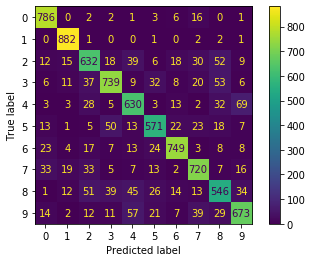

In [17]:
run_SVM(combined_train_data, combined_test_data, combined_train_label, combined_test_label)

# 5-fold Cross Validation (3 combos from normalization, outlier removal, ML)

In [18]:
# Example of 5-Fold Cross Validation Setup
from sklearn.model_selection import KFold

def five_fold(data, labels):
    '''
    Separate data and labels into the five fold cross validation sets training and testing sets.
    
    Input:
        - data
        - labels
    Output:
        List of [train_data_kfold, test_data_kfold, train_labels_kfold, test_labels_kfold]
    '''
    kf = KFold(n_splits=5) # random_state=None, shuffle=False

    kf_combined_data = KFold(n_splits=5, random_state=None, shuffle=False)

    for train_index, test_index in kf.split(data):

        train_data_kfold, test_data_kfold = data.iloc[train_index], \
        data.iloc[test_index]
        train_labels_kfold, test_labels_kfold = labels.iloc[train_index], \
        labels.iloc[test_index]
    
    return [train_data_kfold, test_data_kfold, train_labels_kfold, test_labels_kfold]

#     print(train_data_kfold)
#     print(train_labels_kfold)
#     print(test_data_kfold)
#     print(test_labels_kfold)


## Combination 1 (Wilks's Outlier Removal, Normalization - Type 1, Bayes Classifier)

Classification Accuracy of Naive Bayes Classifier is:  0.7105771552765032
Classification Accuracy of Naive Bayes Classifier is:  0.7051932367149758
Classification Accuracy of Naive Bayes Classifier is:  0.7121102248005802
Classification Accuracy of Naive Bayes Classifier is:  0.7038243455181566
Classification Accuracy of Naive Bayes Classifier is:  0.7177536231884057


0.7098917170997244

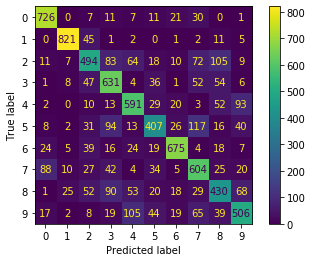

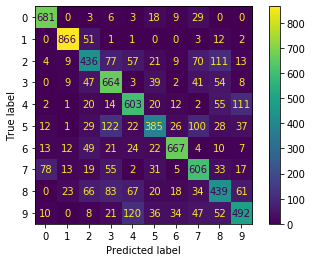

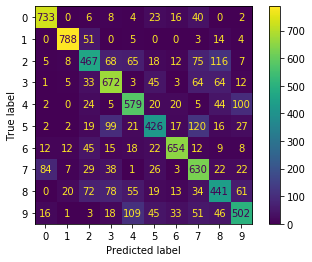

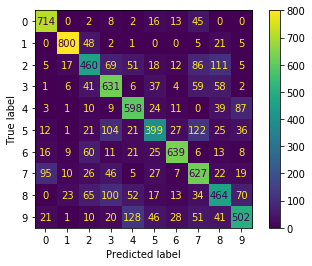

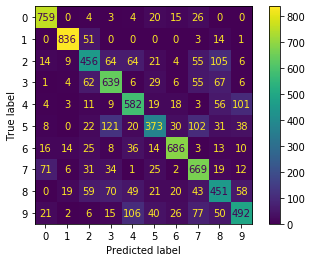

In [19]:
from sklearn.model_selection import KFold

def combo_1_5_fold(combined_data):
    '''
    Combination of Wilk's Outlier Removal, Noramlization - Type 1 (global normalization)
    and Naive Bayes Classifier.
    
    Input:
        - combined_data = input data
    Output:
        - avg_ca = average classification accuracy from 5 fold cross validation
    '''
    kf = KFold(n_splits=5) # random_state=None, shuffle=False
    
    kf_combined_data = KFold(n_splits=5, random_state=None, shuffle=False)
    
    classification_accuracies = []
    num_ca = 0

    for train_index, test_index in kf.split(combined_data):

        train_data_kfold, test_data_kfold = train_data.iloc[train_index], \
        train_data.iloc[test_index]
        train_labels_kfold, test_labels_kfold = train_labels.iloc[train_index], \
        train_labels.iloc[test_index]

        '''
        Normalization Type 1 - Global Normalization

        Global Normalization
                                      X                                                   
                               N = --------                                               
                                    ||X||   
        '''
        # split before normalization of trianing and testing to avoid introducing 
        # future info (from testing set) to the normalization of training
        train_data_normalized = normalize(train_data_kfold, 1)  
        train_separate_data_dict = separate_data_based_on_labels(train_data_normalized, \
                                                                 train_labels_kfold)        
        train_outliers_removed_dict = outlier_removal_step(train_separate_data_dict)
        train_combined_data_with_labels = combine_outliers_removed_data(train_outliers_removed_dict)
        # split into data and labels
        combined_train_data = train_combined_data_with_labels.iloc[:,:-1]
        combined_train_labels = train_combined_data_with_labels.iloc[:,-1]
        
        test_data_normalized = normalize(test_data_kfold, 1)
        test_separate_data_dict = separate_data_based_on_labels(test_data_normalized, \
                                                                test_labels_kfold)
        test_outliers_removed_dict = outlier_removal_step(test_separate_data_dict)
        test_combined_data_with_labels = combine_outliers_removed_data(test_outliers_removed_dict)
        # split into data and labels
        combined_test_data = test_combined_data_with_labels.iloc[:,:-1]
        combined_test_labels = test_combined_data_with_labels.iloc[:,-1]
        
        # add the classification accuracies into a list
        classification_accuracies.append(run_NAIVE_BAYES_CLASSIFIER(combined_train_data,
                        combined_test_data, combined_train_labels, combined_test_labels))
        
        num_ca += 1;
        
    # calculate average classification accuracy of the 5-fold 
    avg_ca = sum(classification_accuracies) / num_ca
    
    return avg_ca
    
# train_data is data before normalization
combo_1_5_fold(train_data)



## Combination 2 (Wilks's Outlier Removal, Normalization - Type 4, RBFNN)

In [20]:
from sklearn.model_selection import KFold

def combo_2_5_fold(combined_data):
    '''
    Combination of Wilk's Outlier Removal, Noramlization - Type 4 and RBFNN.
    
    Input:
        - combined_data = input data
    Output:
        - avg_ca = average classification accuracy from 5 fold cross validation
    '''
    kf = KFold(n_splits=5) # random_state=None, shuffle=False
    
    kf_combined_data = KFold(n_splits=5, random_state=None, shuffle=False)
    
    classification_accuracies = []
    num_ca = 0

    for train_index, test_index in kf.split(combined_data):

        train_data_kfold, test_data_kfold = train_data.iloc[train_index], \
        train_data.iloc[test_index]
        train_labels_kfold, test_labels_kfold = train_labels.iloc[train_index], \
        train_labels.iloc[test_index]

        '''
        Normalization Type 4 - Normalization of the data between [a, b].
        This method is the default and a = -1, b = 1
                                     X - min(X)                                         
                                N = --------------- * (b-a)+a                             
                                    max(X)-min(X)   
        '''
        # split before normalization of trianing and testing to avoid introducing 
        # future info (from testing set) to the normalization of training
        train_data_normalized = normalize(train_data_kfold, 4)  
        train_separate_data_dict = separate_data_based_on_labels(train_data_normalized, 
                                                                 train_labels_kfold)        
        train_outliers_removed_dict = outlier_removal_step(train_separate_data_dict)
        train_combined_data_with_labels = combine_outliers_removed_data(train_outliers_removed_dict)
        # split into data and labels
        combined_train_data = train_combined_data_with_labels.iloc[:,:-1]
        combined_train_labels = train_combined_data_with_labels.iloc[:,-1]
        
        test_data_normalized = normalize(test_data_kfold, 4)
        test_separate_data_dict = separate_data_based_on_labels(test_data_normalized, 
                                                                test_labels_kfold)
        test_outliers_removed_dict = outlier_removal_step(test_separate_data_dict)
        test_combined_data_with_labels = combine_outliers_removed_data(test_outliers_removed_dict)
        # split into data and labels
        combined_test_data = test_combined_data_with_labels.iloc[:,:-1]
        combined_test_labels = test_combined_data_with_labels.iloc[:,-1]
        
        '''
        Break down data set into smaller chunks (1% of training set and 1% of testing set):
        Training : (331, 10)
        Testing : (83, 10)

        POTENTIAL IMPROVEMENTS:
        - increase to 10k observation set, with 8k in the training set and 2k in the testing set
        '''

        x, decreased_combined_train_data, y, decreased_combined_train_label = \
        train_test_split(combined_train_data, combined_train_labels, test_size=0.01) 

        x, decreased_combined_test_data, y, decreased_combined_test_label = \
        train_test_split(combined_test_data, combined_test_labels, test_size=0.01)

        # add the classification accuracies into a list
        classification_accuracies.append(run_RBFNN(decreased_combined_train_data, 
        decreased_combined_test_data, decreased_combined_train_label, 
                                                   decreased_combined_test_label))
        num_ca += 1;
    
    avg_ca = sum(classification_accuracies) / num_ca
    # calculate average classification accuracy of the 5-fold 
    return avg_ca
    
# train_data is data before normalization
combo_2_5_fold(train_data)


Accuracy of RBF NN: 44.047619047619044
Accuracy of RBF NN: 47.61904761904761
Accuracy of RBF NN: 42.168674698795186
Accuracy of RBF NN: 59.523809523809526
Accuracy of RBF NN: 55.42168674698795


49.75616752725186

## Combination 3 (Wilks's Outlier Removal, Normalization - Type 4, SVM)

Accuracy of Radial Basis Function SVM is 0.8360299444578604%
Accuracy of Radial Basis Function SVM is 0.8304347826086956%
Accuracy of Radial Basis Function SVM is 0.8321247280638143%
Accuracy of Radial Basis Function SVM is 0.8294124743636144%
Accuracy of Radial Basis Function SVM is 0.8380434782608696%


0.8332090815509708

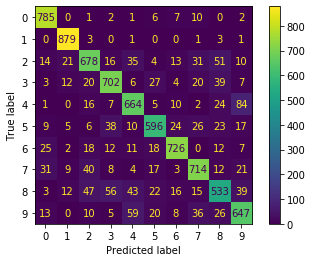

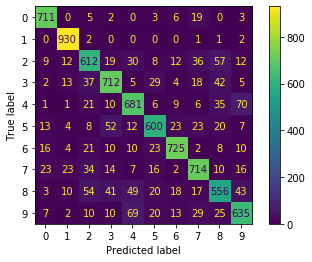

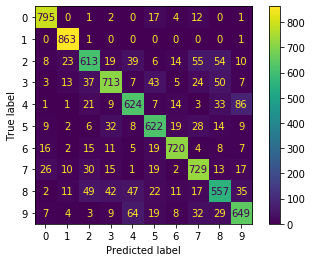

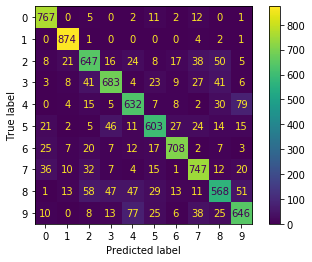

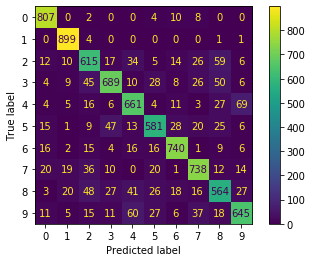

In [21]:
from sklearn.model_selection import KFold

def combo_3_5_fold(combined_data):
    '''
    Combination of Wilk's Outlier Removal, Noramlization - Type 4
    and Support Vector Machine.
    
    Input:
        - combined_data = input data
    Output:
        - avg_ca = average classification accuracy from 5 fold cross validation
    '''
    kf = KFold(n_splits=5) # random_state=None, shuffle=False
    
    kf_combined_data = KFold(n_splits=5, random_state=None, shuffle=False)
    
    classification_accuracies = []
    num_ca = 0

    for train_index, test_index in kf.split(combined_data):

        train_data_kfold, test_data_kfold = train_data.iloc[train_index], \
        train_data.iloc[test_index]
        train_labels_kfold, test_labels_kfold = train_labels.iloc[train_index], \
        train_labels.iloc[test_index]

        '''
        Normalization Type 4 - Normalization of the data between [a, b].
        This method is the default and a = -1, b = 1
                                     X - min(X)                                         
                                N = --------------- * (b-a)+a                             
                                    max(X)-min(X)   
        '''
        # split before normalization of trianing and testing to avoid introducing 
        # future info (from testing set) to the normalization of training
        train_data_normalized = normalize(train_data_kfold, 1)  
        train_separate_data_dict = separate_data_based_on_labels(train_data_normalized, 
                                                                 train_labels_kfold)        
        train_outliers_removed_dict = outlier_removal_step(train_separate_data_dict)
        train_combined_data_with_labels = combine_outliers_removed_data(train_outliers_removed_dict)
        # split into data and labels
        combined_train_data = train_combined_data_with_labels.iloc[:,:-1]
        combined_train_labels = train_combined_data_with_labels.iloc[:,-1]
        
        test_data_normalized = normalize(test_data_kfold, 1)
        test_separate_data_dict = separate_data_based_on_labels(test_data_normalized, 
                                                                test_labels_kfold)
        test_outliers_removed_dict = outlier_removal_step(test_separate_data_dict)
        test_combined_data_with_labels = combine_outliers_removed_data(test_outliers_removed_dict)
        # split into data and labels
        combined_test_data = test_combined_data_with_labels.iloc[:,:-1]
        combined_test_labels = test_combined_data_with_labels.iloc[:,-1]
        
        # add the classification accuracies into a list
        classification_accuracies.append(run_SVM(combined_train_data, 
                combined_test_data, combined_train_labels, combined_test_labels))
        
        num_ca += 1;
        
    # calculate average classification accuracy of the 5-fold 
    return sum(classification_accuracies) / num_ca
    
# train_data is data before normalization
combo_3_5_fold(train_data)


# Analysis of results

When carrying out 5-fold cross validation on our dataset (a resampling procedure used to evaluate ML models on a limited data sample), the combination of Normalization of Type 4 (normalization of the data between a and b, where a = -1 and b = 1), followed by Wilk’s Outlier Removal and a Support Vector Machine Classifier gave the best results. It resulted in a 83.32% classification accuracy when averaging the classification accuracies that came out of the 5-fold cross validation. This was the highest accuracy (out of the 3 combination of methods tested) for the 10 digits.
